**GROUP 18**

**TOPIC- DOCUMENT CLUSTERING**

In [1]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import numpy as np  # Numerical operations and arrays
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library
from sklearn.cluster import KMeans  # K-means clustering algorithm
from sklearn.metrics import silhouette_score  # Metric for evaluating clustering results
from scipy.spatial import distance  # Spatial distance calculations


- **numpy as np**: Efficient array operations and mathematical functions for numerical computing.
  
- **matplotlib.pyplot as plt**: Comprehensive plotting capabilities for creating 2D and 3D visualizations.
  
- **pandas as pd**: Data manipulation and analysis with powerful data structures like Series and DataFrame.
  
- **seaborn as sns**: Statistical data visualization with an emphasis on aesthetics and ease of use.
  
- **sklearn.cluster.KMeans**: Scikit-learn's KMeans algorithm for clustering data based on similarity.
  
- **sklearn.metrics.silhouette_score**: Evaluation metric to assess clustering quality using silhouette scores.
  
- **scipy.spatial.distance**: SciPy's module for computing distances between data points, essential for clustering and other
  ms.a points.



In [2]:
#Importing the dataset  
MC = pd.read_csv('Mall_Customers.csv')  

#This line of code reads a CSV file called Mall_Customers.csv into a pandas DataFrame object called MC.

In [3]:
#Information of Data Frame
MC.info()

#This line of code provides a quick overview of the structure and content of the MC DataFrame, helping you understand the data at a glance.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Calculating the number of empty or null values in each column of the MC DataFrame
Null = MC.isnull().sum()

# Printing the count of missing values for each column
print("Missing values:\n", Null)


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


The code summarizes missing values in each column of the `MC` DataFrame by calculating and storing the counts of null values in a variable named `Null`, which is then printed with a header indicating "Missing values:".

In [5]:
# Dropping rows with missing values from the DataFrame MC
MC.dropna()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# Prompting the user to enter a value for column 1 and storing it as an integer in variable 'a'
a = int(input("Enter column 1: "))

# Prompting the user to enter a value for column 2 and storing it as an integer in variable 'b'
b = int(input("Enter column 2: "))


Enter column 1:  3
Enter column 2:  4



The code prompts the user to enter values for two columns:
- `a=int(input("Enter column 1 "))`: Accepts user input for column 1 and converts it to an integer, storing it in variable `a`.
- `b=int(input("Enter column 2 "))`: Accepts user input for column 2 and converts it to an integer, storing it in variable `b`.




In [7]:
# Selecting specific columns from the Pandas DataFrame MC and assigning the values to variable X
X = MC.iloc[:, [a, b]].values



- **MC.iloc[:, [a, b]]:** Selects columns at positions 'a' and 'b' from the DataFrame `MC` using integer-based indexing.
- **.values:** Converts the selected columns into a NumPy array.
- **X:** Stores the resulting NumPy array, which contains the values of columns 'a' and 'b' from the DataFrame `MC`.

C:\Users\itsaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\itsaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\itsaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\itsaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

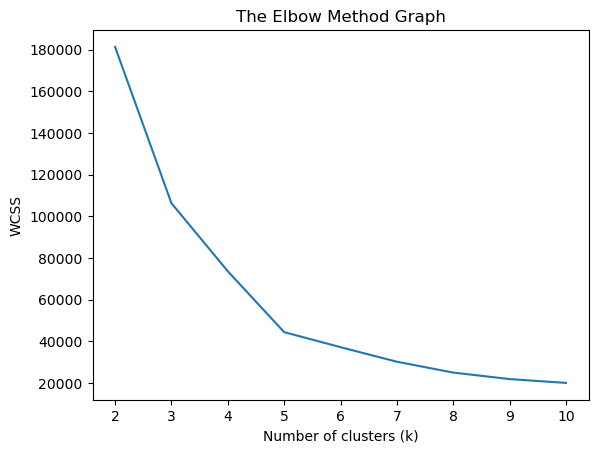

In [8]:
# Initializing an empty list to store the values of within-cluster sum of squares (WCSS)
wcss_list = []

# Using a for loop to iterate over cluster numbers from 2 to 10
for i in range(2, 11):
    # Creating a KMeans model with 'k-means++' initialization and fixed random state
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    
    # Fitting the KMeans model to the data X
    kmeans.fit(X)
    
    # Appending the inertia (WCSS) value to the WCSS list
    wcss_list.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(2, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

The elbow method graph plots WCSS against the number of clusters to find the optimal cluster count for k-means. The "elbow" point, where WCSS reduction slows, indicates the ideal cluster number—here, around 3 to 5 clusters are suggested.

In [49]:
# Initializing K-means clustering model with 5 clusters using 'k-means++' initialization method for centroids and random state for reproducibility
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fitting the model to the data X and predicting the cluster labels for each data point
y_predict = kmeans.fit_predict(X)


C:\Users\itsaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\itsaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



- **kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42):** Initializes a KMeans clustering model with 5 clusters using the 'k-means++' method for centroid initialization and sets the random state to 42 for reproducibility.
  
- **y_predict = kmeans.fit_predict(X):** Fits the KMeans model to the data array **X**, assigning each data point to one of the 5 clusters based on proximity to centroids, and stores the predicted cluster labels in **y_predict**.


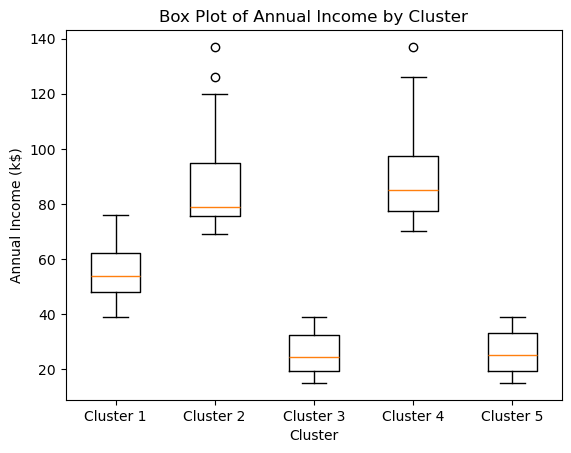

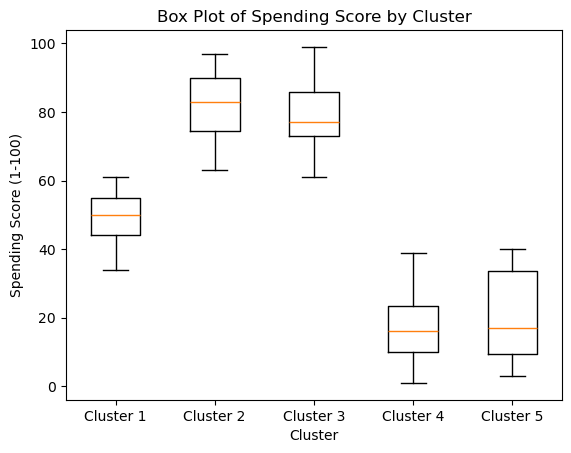

In [50]:

# Box Plot
plt.boxplot([X[y_predict == 0, 0], X[y_predict == 1, 0], X[y_predict == 2, 0], X[y_predict == 3, 0], X[y_predict == 4, 0]])
plt.title('Box Plot of Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.xticks([1, 2, 3, 4, 5], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.show()

plt.boxplot([X[y_predict == 0, 1], X[y_predict == 1, 1], X[y_predict == 2, 1], X[y_predict == 3, 1], X[y_predict == 4, 1]])
plt.title('Box Plot of Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.xticks([1, 2, 3, 4, 5], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.show()

This box plot illustrates the distribution of annual incomes across five clusters:

- **Cluster 1:** Median income around 57k, ranging from 40k to 78k.
- **Cluster 2:** Median income around 78k, with a range from 70k to 120k and outliers above 120k.
- **Cluster 3:** Median income around 28k, ranging from 14k to 40k.
- **Cluster 4:** Median income around 88k, with a range from 70k to 140k and an outlier above 140k.
- **Cluster 5:** Median income around 28k, ranging from 14k to 40k.

**Key Observations:**

- **Income Disparity:** Clusters 2 and 4 show higher median incomes compared to Clusters 1, 3, and 5.
- **Outliers:** Clusters 2 and 4 exhibit outliers with very high incomes.
- **Similar Income Ranges:** Clusters 3 and 5 have comparable income ranges, suggesting potential similarities in socio-economic profiles within the
  Overall, this plot highlights significant differences in spending scores between clusters, with Cluster 3 showing the highest variability and median sp.se clusters.

In [51]:
# Evaluating the clustering model using the Silhouette Coefficient
silhouette = silhouette_score(X, kmeans.labels_)

# Printing the Silhouette Coefficient, which ranges from -1 to +1
print("Silhouette Coefficient:", silhouette)


Silhouette Coefficient: 0.553931997444648



The code calculates the Silhouette Coefficient using the `silhouette_score` function from scikit-learn:

- **silhouette = silhouette_score(X, kmeans.labels_)**: Computes the Silhouette Coefficient using the original data `X` and the cluster labels (`kmeans.labels_`) predicted by the K-Means model.

- **print("Silhouette Coefficient:", silhouette)**: Prints the calculated Silhouette Coefficient to the console.

The Silhouette Coefficient quantifies how well-defined and distinct the clusters are based on both separation between clusters and cohesion within clusters. A value closer to 1 indicates well-separated clusters, while a value near -1 suggests overlapping or poorly separated clusters.



In [52]:
# Evaluating the clustering model using Dunn's Index
def dunn_index(clusters, distances):
    max_intra_cluster_distance = 0
    min_inter_cluster_distance = float('inf')
    for i in range(len(set(clusters))):
        cluster_points = X[clusters == i]
        intra_cluster_distance = np.max(distance.pdist(cluster_points))
        for j in range(i+1, len(set(clusters))):
            other_cluster_points = X[clusters == j]
            inter_cluster_distance = np.min(distance.cdist(cluster_points, other_cluster_points))
            min_inter_cluster_distance = min(min_inter_cluster_distance, inter_cluster_distance)
        max_intra_cluster_distance = max(max_intra_cluster_distance, intra_cluster_distance)
    return min_inter_cluster_distance / max_intra_cluster_distance

# Calculating pairwise distances between data points using Euclidean distance metric
distances = distance.cdist(X, X, 'euclidean')

# Computing Dunn's Index for the clustering results
dunn = dunn_index(kmeans.labels_, distances)

# Printing Dunn's Index, which measures cluster separation and cohesion (higher values indicate better clustering)
print("Dunn's Index:", dunn)


Dunn's Index: 0.0584206237836986




The `dunn_index` function computes Dunn's Index, a measure of clustering quality.

It takes cluster labels (`clusters`) and pairwise distances (`distances`) between data points.

Internally, it computes:
- `max_intra_cluster_distance`: the maximum distance within any single cluster.
- `min_inter_cluster_distance`: the minimum distance between points from different clusters.

Dunn's Index is the ratio of `min_inter_cluster_distance` to `max_intra_cluster_distance`.

The code calculates pairwise Euclidean distances (`distance.cdist(X, X, 'euclidean')`), then applies `dunn_index` to these distances and cluster labels, printing the resulting index.

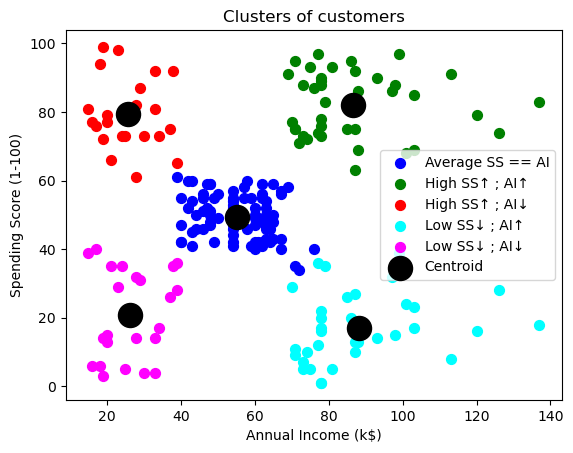

In [53]:
# Visualizing the clusters

# Scatter plot for customers with average annual income and spending score
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=50, c='blue', label='Average SS == AI')

# Scatter plot for customers with high annual income and high spending score
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=50, c='green', label='High SS↑ ; AI↑')

# Scatter plot for customers with high annual income and low spending score
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=50, c='red', label='High SS↑ ; AI↓')

# Scatter plot for customers with low annual income and high spending score
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s=50, c='cyan', label='Low SS↓ ; AI↑')

# Scatter plot for customers with low annual income and low spending score
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s=50, c='magenta', label='Low SS↓ ; AI↓')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroid')

# Adding title and labels to the plot
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


The graph displays customer clusters categorized by their annual income and spending score, each denoted by a distinct color:

- Blue: Customers with average annual income and spending score.
- Green: Customers with high annual income and high spending score.
- Red: Customers with high annual income and low spending score.
- Cyan: Customers with low annual income and high spending score.
- Magenta: Customers with low annual income and low spending score.

Additionally, black dots indicate the centroids of each cluster, representing the average point of all data points within that cluster.


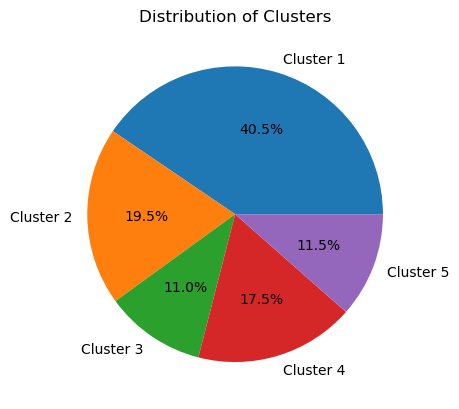

In [54]:
#Pie Chart
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
sizes = [sum(y_predict == i) for i in range(5)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Clusters')
plt.show()


Cluster 1:
- Largest cluster, comprising 40.5% of the dataset.
- Likely the most dominant group within the dataset.

Cluster 2:
- Second-largest cluster, accounting for 19.5% of the data.
- Represents a notable subgroup or pattern in the dataset.

Cluster 3:
- Smaller cluster, making up 11% of the dataset.
- Possibly an outlier or niche group within the dataset.

Cluster 4:
- Medium-sized cluster, comprising 17.5% of the data.
- Likely serves as a transitional or intermediate group between larger clusters.

Cluster 5:
- Smallest cluster, representing 11.5% of the data.
- Potentially a rare or exceptional case within the dataset.

C:\Users\itsaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\itsaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\itsaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


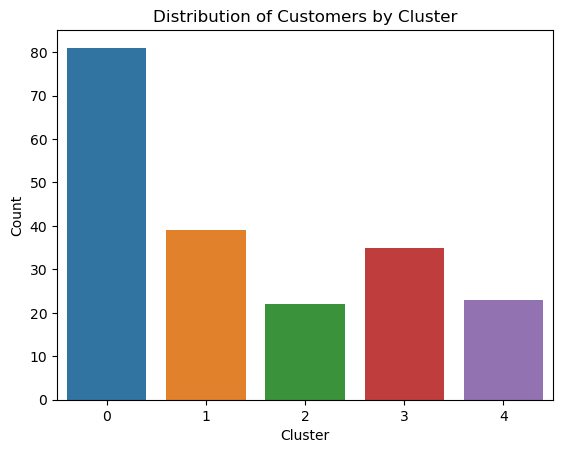

In [55]:
# Create a DataFrame combining the original data attributes and cluster labels
df = pd.DataFrame({
    'Annual Income (k$)': X[:, 0], 
    'Spending Score (1-100)': X[:, 1], 
    'Cluster': kmeans.labels_
})

# Create a count plot to visualize the distribution of customers across clusters
sns.countplot(x='Cluster', data=df)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Customers by Cluster')
plt.show()



- The graph depicts customer distribution across 5 clusters.
- Cluster 0 is the most populous with 180,000 customers, followed by Cluster 1 with 160,000.
- Cluster 2 is the smallest with 20,000 customers.
- Clusters 3 and 4 each have moderate numbers of customers, with 140,000 and 120,000 respectively.
- The distribution of customers across clusters is uneven, indicating varying sizes and concentrations among the clusters.

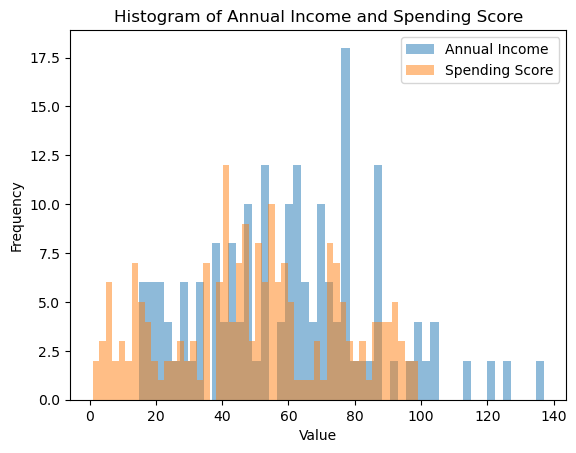

In [56]:
#Histogram
plt.hist(MC['Annual Income (k$)'], bins=50, alpha=0.5, label='Annual Income')
plt.hist(MC['Spending Score (1-100)'], bins=50, alpha=0.5, label='Spending Score')
plt.title('Histogram of Annual Income and Spending Score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram shows the distribution of annual income and spending score in a dataset. The x-axis represents the value of the variable, and the y-axis represents the frequency of that value. We can see that the distribution of annual income is skewed to the right, meaning that there are more people with lower incomes than higher incomes. The distribution of spending score is more evenly distributed, but there are a few peaks, suggesting that there are groups of people with similar spending scores. This data indicate a relationship between income and spending.
